# Pandas
The Pandas library Provides
* High-performance
* Easy-to-use data structures and
* Data analysis tools

#### Data Structures

* Series objects
** 1D array, similar to a column in a spreadsheet

* DataFrame objects
** 2D table, similar to a spreadsheet

* Panel objects
** Dictionary of DataFrames

In [1]:
import pandas as pd
import numpy as np

In [2]:
s = pd.Series([2,-1,3,5])

In [3]:
print(s)

0    2
1   -1
2    3
3    5
dtype: int64


In [4]:
np.square(s)

0     4
1     1
2     9
3    25
dtype: int64

In [5]:
#Broadcasting
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

In [6]:
# camparing series
print(s)
s < 0

0    2
1   -1
2    3
3    5
dtype: int64


0    False
1     True
2    False
3    False
dtype: bool

In [7]:
#Arithmetic operation on the series
s + [1000,2000,3000,4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

In [8]:
# Index labels - Integer location
s2 = pd.Series([68, 83, 112, 68])
print(s2)

0     68
1     83
2    112
3     68
dtype: int64


In [9]:
#Index labels - Set Manually
s2 = pd.Series([68, 83, 112, 68],
index=["alice", "bob", "charles", "darwin"])

print(s2)

alice       68
bob         83
charles    112
darwin      68
dtype: int64


In [10]:
# Access the items in series
s2[1]

83

In [11]:
s2["bob"]

83

In [12]:
# Access the items in series - Recommendations
# ● Use the loc attribute when accessing by label

print(s2.loc["bob"])

# ● Use iloc attribute when accessing by integer location

print(s2.iloc[1])

83
83


In [13]:
# Init from Python dict

weights = {"alice": 68, "bob": 83, "colin": 86,"darwin": 68}
s3 = pd.Series(weights)
print(s3)

alice     68
bob       83
colin     86
darwin    68
dtype: int64


In [14]:
s4 = pd.Series(weights, index = ["colin", "alice"])
print(s4)
print("================================")
s4 = pd.Series(s3, index = ["colin", "alice"])
print(s4)

colin    86
alice    68
dtype: int64
colin    86
alice    68
dtype: int64


In [15]:
print (s2,"\n \n \n",s3)

alice       68
bob         83
charles    112
darwin      68
dtype: int64 
 
 
 alice     68
bob       83
colin     86
darwin    68
dtype: int64


In [16]:
# Automatic alignment - example
print(s2+s3)

alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64


In [17]:
# Do not forget to set the right index labels, else you may get surprising results
s5 = pd.Series([1000,1000,1000,1000])
print(s2 + s5)

alice     NaN
bob       NaN
charles   NaN
darwin    NaN
0         NaN
1         NaN
2         NaN
3         NaN
dtype: float64


In [18]:
# Init with a scalar

meaning = pd.Series(42, ["life", "universe","everything"])
print(meaning)

life          42
universe      42
everything    42
dtype: int64


In [19]:
#Data Frames
print(s2)
print("-----"*8)
print(s3)
print("-----"*8)
print(s4)
print("-----"*8)

alice       68
bob         83
charles    112
darwin      68
dtype: int64
----------------------------------------
alice     68
bob       83
colin     86
darwin    68
dtype: int64
----------------------------------------
colin    86
alice    68
dtype: int64
----------------------------------------


In [20]:
print(pd.DataFrame([s2, s3, s4]))

   alice   bob  charles  darwin  colin
0   68.0  83.0    112.0    68.0    NaN
1   68.0  83.0      NaN    68.0   86.0
2   68.0   NaN      NaN     NaN   86.0


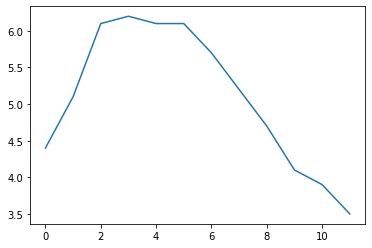

In [21]:
# Plotting a series

%matplotlib inline
import matplotlib.pyplot as plt
temperatures =[4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

In [22]:
#Creating a DataFrame - Pass a dictionary of Series objects

people_dict = {

"weight": pd.Series([68, 83, 112],index=["alice",
"bob", "charles"]),

"birthyear": pd.Series([1984, 1985, 1992],
index=["bob", "alice", "charles"], name="year"),

"children": pd.Series([0, 3], index=["charles",
"bob"]),

"hobby": pd.Series(["Biking", "Dancing"],
index=["alice", "bob"]),
}

In [23]:
#Creating a DataFrame

people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [24]:
# DataFrame - Access a column

people["birthyear"]

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [25]:
# DataFrame - Access the multiple columns

people[["birthyear", "hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


In [26]:
# # DataFrame - Access the rows
people.loc['bob']

weight            83
birthyear       1984
children           3
hobby        Dancing
Name: bob, dtype: object

In [27]:
people.loc[['bob','alice']]

,weight,birthyear,children,hobby
bob,83,1984,3.0,Dancing
alice,68,1985,NaN,Biking


In [28]:
people.iloc[[1, 2]]

,weight,birthyear,children,hobby
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [29]:
# DataFrame - Get a slice of rows

people.iloc[1:3]

,weight,birthyear,children,hobby
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [30]:
# Creating DataFrame - Include columns and/or rows and guarantee order

d2 = pd.DataFrame(
people_dict,
columns=["birthyear", "weight", "height"],
index=["bob", "alice", "eugene"]
)


d2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


In [31]:
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [32]:
# DataFrame - Pass a boolean array
#                alice  bob    charles
people[np.array([True, False, True])]

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
charles,112,1992,0.0,NaN


In [33]:
# DataFrame - Pass boolean expression

people[people["birthyear"] < 1990]    # equivalent to where clause in SQL

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing


In [34]:
people["birthyear"] < 1990   # it is same as above

alice       True
bob         True
charles    False
Name: birthyear, dtype: bool

In [35]:
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [36]:
# Adds a new column "age"
people["age"] = 2016 - people["birthyear"]

people

,weight,birthyear,children,hobby,age
alice,68,1985,NaN,Biking,31
bob,83,1984,3.0,Dancing,32
charles,112,1992,0.0,NaN,24


In [37]:
# Adds another column "over 30"
people["over 30"] = people["age"] > 30

people

,weight,birthyear,children,hobby,age,over 30
alice,68,1985,NaN,Biking,31,True
bob,83,1984,3.0,Dancing,32,True
charles,112,1992,0.0,NaN,24,False


In [38]:
# Removes "birthyear" and "children" columns
birthyears = people.pop("birthyear")
print(people)
del people["children"]
people

         weight  children    hobby  age  over 30
alice        68       NaN   Biking   31     True
bob          83       3.0  Dancing   32     True
charles     112       0.0      NaN   24    False


,weight,hobby,age,over 30
alice,68,Biking,31,True
bob,83,Dancing,32,True
charles,112,NaN,24,False


#### DataFrame - A new column must have the same number of rows

In [39]:

# alice is missing, eugene is ignored

people["pets"] = pd.Series({"bob": 0,
                            "charles": 5,
                            "eugene":1
                            })
people

,weight,hobby,age,over 30,pets
alice,68,Biking,31,True,NaN
bob,83,Dancing,32,True,0.0
charles,112,NaN,24,False,5.0


In [40]:
# DataFrame - Add a new column using insert method after an existing column
#        index --column name ---value

people.insert(1, "height", [172, 181, 185])
people

,weight,height,hobby,age,over 30,pets
alice,68,172,Biking,31,True,NaN
bob,83,181,Dancing,32,True,0.0
charles,112,185,NaN,24,False,5.0


In [41]:
# DataFrame - Add new columns using assign method

def myfunc(x):
    print(x)
    return x["height"]**2
people.assign(square = myfunc)

         weight  height    hobby  age  over 30  pets
alice        68     172   Biking   31     True   NaN
bob          83     181  Dancing   32     True   0.0
charles     112     185      NaN   24    False   5.0


,weight,height,hobby,age,over 30,pets,square
alice,68,172,Biking,31,True,NaN,29584
bob,83,181,Dancing,32,True,0.0,32761
charles,112,185,NaN,24,False,5.0,34225


In [44]:
# DataFrame - Add new columns using assign method

people = (people.assign (body_mass_index = lambda df: 
                                  df["weight"] / (df["height"] / 100) ** 2)
        .assign  (overweight     = lambda df: 
                                    df["body_mass_index"] > 25))


In [45]:
people

,weight,height,hobby,age,over 30,pets,body_mass_index,overweight
alice,68,172,Biking,31,True,NaN,22.985398,False
bob,83,181,Dancing,32,True,0.0,25.335002,True
charles,112,185,NaN,24,False,5.0,32.724617,True


In [49]:
# Querying a DataFrame

people.query("age > 30 and pets <= 0 and weight > 80")

,weight,height,hobby,age,over 30,pets,body_mass_index,overweight
bob,83,181,Dancing,32,True,0.0,25.335002,True


#### DataFrame - Sorting a DataFrame

* Use sort_index method
* It sorts the rows by their index label
* In ascending order
* Reverse the order by passing ascending=False
* Returns a sorted copy of DataFrame

In [51]:
people.sort_index(ascending=False)  # by default Ascending order

,weight,height,hobby,age,over 30,pets,body_mass_index,overweight
charles,112,185,NaN,24,False,5.0,32.724617,True
bob,83,181,Dancing,32,True,0.0,25.335002,True
alice,68,172,Biking,31,True,NaN,22.985398,False


In [52]:
people   # checking changes

,weight,height,hobby,age,over 30,pets,body_mass_index,overweight
alice,68,172,Biking,31,True,NaN,22.985398,False
bob,83,181,Dancing,32,True,0.0,25.335002,True
charles,112,185,NaN,24,False,5.0,32.724617,True


In [55]:
#DataFrame - Sorting a DataFrame - inplace argument

people.sort_index(ascending=False, inplace=True)
people                                                # checking changes

,weight,height,hobby,age,over 30,pets,body_mass_index,overweight
charles,112,185,NaN,24,False,5.0,32.724617,True
bob,83,181,Dancing,32,True,0.0,25.335002,True
alice,68,172,Biking,31,True,NaN,22.985398,False


In [56]:
# DataFrame - Sorting a DataFrame - Sort By Value

people.sort_values(by="age", inplace=True)
people

,weight,height,hobby,age,over 30,pets,body_mass_index,overweight
charles,112,185,NaN,24,False,5.0,32.724617,True
alice,68,172,Biking,31,True,NaN,22.985398,False
bob,83,181,Dancing,32,True,0.0,25.335002,True


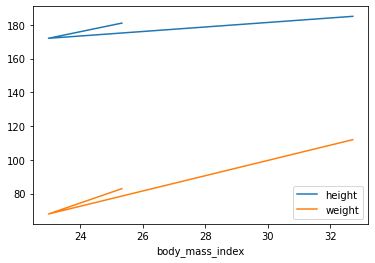

In [57]:
#Plotting a DataFrame

people.plot(

kind = "line",
x = "body_mass_index",
y = ["height", "weight"]
)

plt.show()

#### DataFrames - Saving and Loading

● Pandas can save DataFrames to various backends such as
* CSV
○ Excel (requires openpyxl library)
○ JSON
○ HTML
○ SQL database

In [58]:
my_df = pd.DataFrame(
[

["Biking", 68.5, 1985, np.nan],
["Dancing", 83.1, 1984, 3]
],

columns=["hobby","weight","birthyear","children"],
index=["alice", "bob"]

)
#---------------
my_df

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


DataFrames - Saving



In [63]:
# Save to CSV
my_df.to_csv("my_df.csv")

# Save to HTML
my_df.to_html("my_df.html")

#Save to JSON
my_df.to_json("my_df.json")

In [64]:
!ls                            # accessing all files in dir

Bikes_problem.ipynb
Bikes_solution.ipynb
cat_vs_noncat_classifier.ipynb
cat_vs_noncat_numpy.ipynb
churn_emails_inbox_with_python_433.ipynb
classify_clothes.ipynb
classifying_flowers_iris_with_keras.ipynb
convolutional_neural_networks_and_computer_vision_532.ipynb
copy_of_autoencoders_and_gans_772.ipynb
copy_of_natural_language_processing_771.ipynb
copy_of_processing_sequences_with_rnns_and_cnns_770.ipynb
data_structures_and_algorithms_566.ipynb
deep_neural_networks_lecture_videos_541.ipynb
empty_jupyter_file.ipynb
endtoend_ml_project_california_housing_579.ipynb
End_to_end_project.ipynb
fashion_mnist_with_keras.ipynb
foundations_of_python_450.ipynb
foundations_of_python_459.ipynb
getting_started_with_matplotlib_480.ipynb
getting_started_with_various_tools_at_cloudxlab_928.ipynb
hands_on_matplotlib.ipynb
handson_matplotlib.ipynb
machine_learning_prerequisite_mains_862.ipynb
machine_learning_prerequisites_195.ipynb
mbox-short.txt
mbox.txt
Microsoft history.docx
my_df.csv
my_df.html
my_df

In [61]:
# !rm my_df.csv
# !rm my_df.html
# !rm my_df.json
!rm my_df.*        # removing all file names with that extension

In [ ]:
!ls

In [65]:
# open with linux command
!cat my_df.csv      

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,
bob,Dancing,83.1,1984,3.0


In [66]:
# open file with python
for filename in ("my_df.csv", "my_df.html","my_df.json"):
    print("#", filename)
    with open(filename, "rt") as f:
        print(f.read())
        print()

# my_df.csv
,hobby,weight,birthyear,children
alice,Biking,68.5,1985,
bob,Dancing,83.1,1984,3.0


# my_df.html
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>hobby</th>
      <th>weight</th>
      <th>birthyear</th>
      <th>children</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>alice</th>
      <td>Biking</td>
      <td>68.5</td>
      <td>1985</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>bob</th>
      <td>Dancing</td>
      <td>83.1</td>
      <td>1984</td>
      <td>3.0</td>
    </tr>
  </tbody>
</table>

# my_df.json
{"hobby":{"alice":"Biking","bob":"Dancing"},"weight":{"alice":68.5,"bob":83.1},"birthyear":{"alice":1985,"bob":1984},"children":{"alice":null,"bob":3.0}}



## DataFrames - Loading

● read_csv # For loading CSV files

● read_html # For loading HTML files

● read_excel # For loading Excel files

In [67]:
# DataFrames - Load CSV file

my_df_loaded = pd.read_csv("my_df.csv", index_col=0)

my_df_loaded

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


## DataFrames - Overview

● Let’s understand below methods

○ head()
○ tail()
○ info()
○ describe()

In [75]:
from sklearn.datasets import fetch_california_housing


data = fetch_california_housing()
housing = pd.DataFrame(data.data, columns=data.feature_names)
housing.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [76]:
housing.tail(n=2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [77]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [78]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


## Matplotlib - pyplot Module - plot()



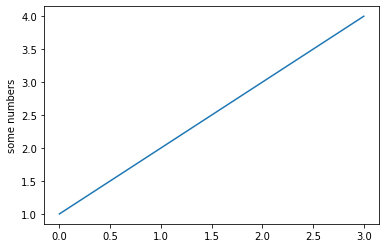

In [79]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

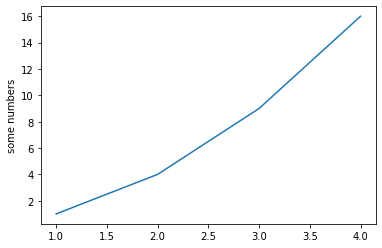

In [80]:
# plot x versus y
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.ylabel('some numbers')
plt.show()

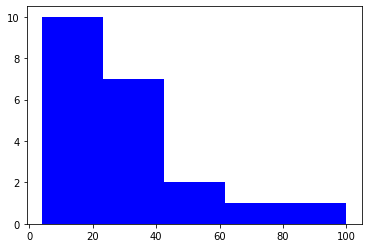

In [81]:
# Matplotlib - pyplot Module - Histogram
x =[21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]
num_bins = 5
plt.hist(x, num_bins, facecolor='blue')
plt.show()